In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
opsd_daily=pd.read_csv("2012_2013_gc_customerID_11.csv", parse_dates=True)
weather=pd.read_csv("2012_2013_customerID_11.csv", parse_dates=True)

FileNotFoundError: [Errno 2] File 2012_2013_gc_customerID_11.csv does not exist: '2012_2013_gc_customerID_11.csv'

In [ ]:
print(opsd_daily.shape)
print(weather.shape)

(17519, 2)
(17519, 15)


In [ ]:
opsd_daily.head()

date  value
0  2012-07-01 00:30:00  0.567
1  2012-07-01 01:00:00  0.547
2  2012-07-01 01:30:00  0.613
3  2012-07-01 02:00:00  0.519
4  2012-07-01 02:30:00  0.314

In [ ]:
weather.head()

zip_code                 date  temperature  apparentTemperature  \
0      2026  2012-07-01 00:30:00        10.77                10.77   
1      2026  2012-07-01 01:00:00        10.21                10.21   
2      2026  2012-07-01 01:30:00        10.21                10.21   
3      2026  2012-07-01 02:00:00         9.48                 9.48   
4      2026  2012-07-01 02:30:00         9.48                 9.48   

   precipIntensity  precipProbability  dewPoint  humidity  pressure  \
0              0.0                0.0      5.48      0.70    1014.8   
1              0.0                0.0      5.52      0.73       0.0   
2              0.0                0.0      5.52      0.73       0.0   
3              0.0                0.0      5.22      0.75       0.0   
4              0.0                0.0      5.22      0.75       0.0   

   windSpeed  windGust  windBearing  uvIndex  cloudCover  visibility  
0       0.75      0.75          294        0        0.78       9.988  
1       0.21      0.61          289        0        1.00       0.000  
2       0.21      0.61          289        0        1.00       0.000  
3       0.33      0.95          284        0        0.88       0.000  
4       0.33      0.95          284        0        0.88       0.000

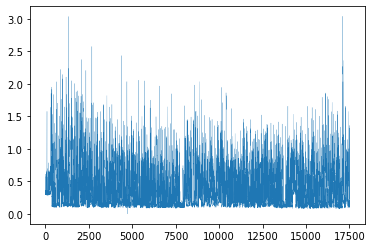

In [ ]:
opsd_daily['value'].plot(linewidth=0.2);

In [ ]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

value  Year  Month Weekday Name
date                                                
2012-11-28 07:00:00  0.152  2012     11    Wednesday
2013-01-20 05:00:00  0.127  2013      1       Sunday
2013-02-17 21:30:00  0.490  2013      2       Sunday
2012-12-27 19:00:00  1.306  2012     12     Thursday
2012-12-08 13:30:00  0.827  2012     12     Saturday

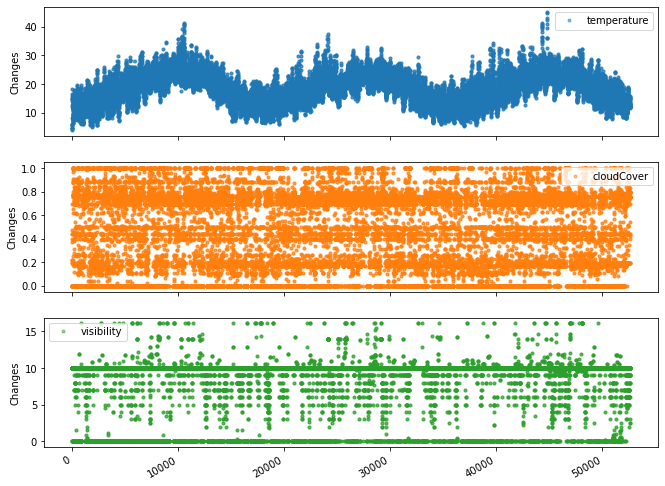

In [ ]:
cols_plot = ['temperature', 'cloudCover', 'visibility']
axes = weather[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Changes')

In [ ]:
weather.drop(columns=["zip_code"], inplace=True)

In [ ]:
df=weather.merge(opsd_daily, on='date', how='left')

In [ ]:
df.head()

date  temperature  apparentTemperature  precipIntensity  \
0  2012-07-01 00:30:00        10.77                10.77              0.0   
1  2012-07-01 01:00:00        10.21                10.21              0.0   
2  2012-07-01 01:30:00        10.21                10.21              0.0   
3  2012-07-01 02:00:00         9.48                 9.48              0.0   
4  2012-07-01 02:30:00         9.48                 9.48              0.0   

   precipProbability  dewPoint  humidity  pressure  windSpeed  windGust  \
0                0.0      5.48      0.70    1014.8       0.75      0.75   
1                0.0      5.52      0.73       0.0       0.21      0.61   
2                0.0      5.52      0.73       0.0       0.21      0.61   
3                0.0      5.22      0.75       0.0       0.33      0.95   
4                0.0      5.22      0.75       0.0       0.33      0.95   

   windBearing  uvIndex  cloudCover  visibility  value  
0          294        0        0.78       9.988  0.567  
1          289        0        1.00       0.000  0.547  
2          289        0        1.00       0.000  0.613  
3          284        0        0.88       0.000  0.519  
4          284        0        0.88       0.000  0.314

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df = df.rename(columns={'value':'GC'})

In [ ]:
df

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:30:00        10.77                10.77           0.0000   
2012-07-01 01:00:00        10.21                10.21           0.0000   
2012-07-01 01:30:00        10.21                10.21           0.0000   
2012-07-01 02:00:00         9.48                 9.48           0.0000   
2012-07-01 02:30:00         9.48                 9.48           0.0000   
...                          ...                  ...              ...   
2013-06-30 21:30:00        12.70                12.70           0.0713   
2013-06-30 22:00:00        12.21                12.21           0.0056   
2013-06-30 22:30:00        12.21                12.21           0.0056   
2013-06-30 23:00:00        11.70                11.70           0.0000   
2013-06-30 23:30:00        11.70                11.70           0.0000   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:30:00               0.00      5.48      0.70    1014.8   
2012-07-01 01:00:00               0.00      5.52      0.73       0.0   
2012-07-01 01:30:00               0.00      5.52      0.73       0.0   
2012-07-01 02:00:00               0.00      5.22      0.75       0.0   
2012-07-01 02:30:00               0.00      5.22      0.75       0.0   
...                                ...       ...       ...       ...   
2013-06-30 21:30:00               0.31     11.49      0.92    1024.7   
2013-06-30 22:00:00               0.04     11.12      0.93    1024.7   
2013-06-30 22:30:00               0.04     11.12      0.93    1024.7   
2013-06-30 23:00:00               0.00     10.52      0.92       0.0   
2013-06-30 23:30:00               0.00     10.52      0.92       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   
2012-07-01 02:30:00       0.33      0.95          284        0        0.88   
...                        ...       ...          ...      ...         ...   
2013-06-30 21:30:00       1.48      1.74          237        0        0.42   
2013-06-30 22:00:00       1.42      2.11          248        0        0.40   
2013-06-30 22:30:00       1.42      2.11          248        0        0.40   
2013-06-30 23:00:00       1.05      3.44          261        0        0.19   
2013-06-30 23:30:00       1.05      3.44          261        0        0.19   

                     visibility     GC  
date                                    
2012-07-01 00:30:00       9.988  0.567  
2012-07-01 01:00:00       0.000  0.547  
2012-07-01 01:30:00       0.000  0.613  
2012-07-01 02:00:00       0.000  0.519  
2012-07-01 02:30:00       0.000  0.314  
...                         ...    ...  
2013-06-30 21:30:00      10.003  0.404  
2013-06-30 22:00:00      10.003  0.747  
2013-06-30 22:30:00      10.003  0.656  
2013-06-30 23:00:00      10.003  0.291  
2013-06-30 23:30:00      10.003  0.230  

[17519 rows x 14 columns]

In [ ]:
df.isna().sum()

temperature            0
apparentTemperature    0
precipIntensity        0
precipProbability      0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
uvIndex                0
cloudCover             0
visibility             0
GC                     0
dtype: int64

In [ ]:
#Export into CSV
# df.to_csv("2012_2013_merged_customerID_11.csv")

## Modeling data

In [3]:
data = pd.read_csv("2012_2013_merged_customerID_11.csv", index_col = "date", parse_dates=True)
data.head()   

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:30:00        10.77                10.77              0.0   
2012-07-01 01:00:00        10.21                10.21              0.0   
2012-07-01 01:30:00        10.21                10.21              0.0   
2012-07-01 02:00:00         9.48                 9.48              0.0   
2012-07-01 02:30:00         9.48                 9.48              0.0   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:30:00                0.0      5.48      0.70    1014.8   
2012-07-01 01:00:00                0.0      5.52      0.73       0.0   
2012-07-01 01:30:00                0.0      5.52      0.73       0.0   
2012-07-01 02:00:00                0.0      5.22      0.75       0.0   
2012-07-01 02:30:00                0.0      5.22      0.75       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   
2012-07-01 02:30:00       0.33      0.95          284        0        0.88   

                     visibility     GC  
date                                    
2012-07-01 00:30:00       9.988  0.567  
2012-07-01 01:00:00       0.000  0.547  
2012-07-01 01:30:00       0.000  0.613  
2012-07-01 02:00:00       0.000  0.519  
2012-07-01 02:30:00       0.000  0.314

In [4]:
data.shape

(17519, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17519 entries, 2012-07-01 00:30:00 to 2013-06-30 23:30:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          17519 non-null  float64
 1   apparentTemperature  17519 non-null  float64
 2   precipIntensity      17519 non-null  float64
 3   precipProbability    17519 non-null  float64
 4   dewPoint             17519 non-null  float64
 5   humidity             17519 non-null  float64
 6   pressure             17519 non-null  float64
 7   windSpeed            17519 non-null  float64
 8   windGust             17519 non-null  float64
 9   windBearing          17519 non-null  int64  
 10  uvIndex              17519 non-null  int64  
 11  cloudCover           17519 non-null  float64
 12  visibility           17519 non-null  float64
 13  GC                   17519 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 2.0 MB


In [6]:
# Basic statistics :

data.describe()

temperature  apparentTemperature  precipIntensity  precipProbability  \
count  17519.000000         17519.000000     17519.000000       17519.000000   
mean      18.238086            18.263778         0.148884           0.090582   
std        5.169058             5.420163         0.746891           0.209576   
min        5.450000             2.990000         0.000000           0.000000   
25%       14.370000            14.370000         0.000000           0.000000   
50%       18.290000            18.310000         0.000000           0.000000   
75%       21.710000            21.760000         0.021300           0.060000   
max       45.000000            45.670000        31.415000           1.000000   

           dewPoint      humidity      pressure     windSpeed      windGust  \
count  17519.000000  17519.000000  17519.000000  17519.000000  17519.000000   
mean      10.632642      0.633191    693.195685      3.031962      3.982912   
std        4.487537      0.154058    474.068234      1.828641      2.662952   
min       -4.400000      0.110000      0.000000      0.000000      0.000000   
25%        7.740000      0.530000      0.000000      1.570000      2.000000   
50%       10.870000      0.630000   1013.500000      2.750000      3.540000   
75%       13.620000      0.720000   1019.500000      4.230000      5.320000   
max       23.850000      0.960000   1033.500000     11.490000     20.720000   

        windBearing       uvIndex    cloudCover    visibility            GC  
count  17519.000000  17519.000000  17519.000000  17519.000000  17519.000000  
mean     187.306353      1.323021      0.410460      9.159643      0.378978  
std      105.758293      2.289687      0.329261      2.645959      0.322044  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%       93.000000      0.000000      0.040000      9.988000      0.146000  
50%      191.000000      0.000000      0.400000     10.003000      0.245000  
75%      283.000000      2.000000      0.750000     10.003000      0.523000  
max      359.000000     12.000000      1.000000     16.093000      3.042000

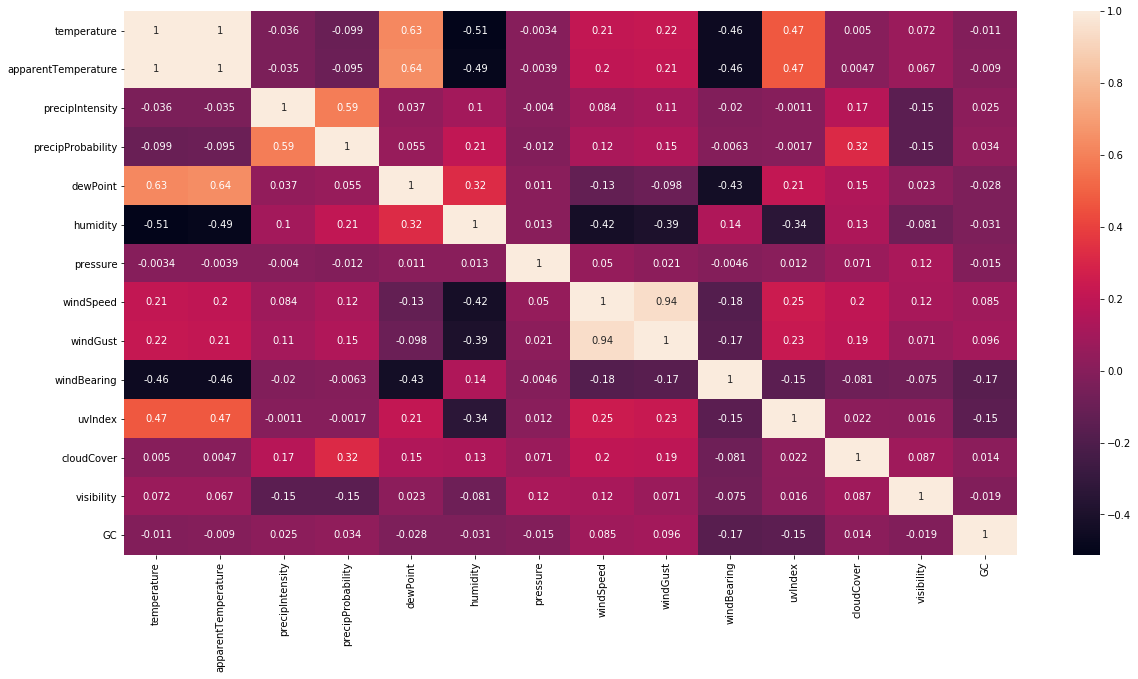

In [7]:
# Checking futures correlation

c = data.corr()

plt.subplots(figsize=(20,10))
sns.heatmap(c, annot=True)

In [8]:
c = data.corr()
abs(c['GC']).sort_values(ascending = False)

GC                     1.000000
windBearing            0.165555
uvIndex                0.147410
windGust               0.096440
windSpeed              0.085489
precipProbability      0.033735
humidity               0.031264
dewPoint               0.027662
precipIntensity        0.024934
visibility             0.018990
pressure               0.014877
cloudCover             0.013904
temperature            0.010635
apparentTemperature    0.008986
Name: GC, dtype: float64

### To verify missing value percentage

In [9]:
100 * data.isnull().sum() / data.shape[0]

temperature            0.0
apparentTemperature    0.0
precipIntensity        0.0
precipProbability      0.0
dewPoint               0.0
humidity               0.0
pressure               0.0
windSpeed              0.0
windGust               0.0
windBearing            0.0
uvIndex                0.0
cloudCover             0.0
visibility             0.0
GC                     0.0
dtype: float64

Every thing is ok, there is no missing value

In [10]:
# data["date"] = pd.to_datetime(data["date"])
# data["date"]

In [11]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=data.index,
                    y=data.GC,
                    name = "Evolution de la conso par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la conso par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [12]:
data.head()

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:30:00        10.77                10.77              0.0   
2012-07-01 01:00:00        10.21                10.21              0.0   
2012-07-01 01:30:00        10.21                10.21              0.0   
2012-07-01 02:00:00         9.48                 9.48              0.0   
2012-07-01 02:30:00         9.48                 9.48              0.0   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:30:00                0.0      5.48      0.70    1014.8   
2012-07-01 01:00:00                0.0      5.52      0.73       0.0   
2012-07-01 01:30:00                0.0      5.52      0.73       0.0   
2012-07-01 02:00:00                0.0      5.22      0.75       0.0   
2012-07-01 02:30:00                0.0      5.22      0.75       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   
2012-07-01 02:30:00       0.33      0.95          284        0        0.88   

                     visibility     GC  
date                                    
2012-07-01 00:30:00       9.988  0.567  
2012-07-01 01:00:00       0.000  0.547  
2012-07-01 01:30:00       0.000  0.613  
2012-07-01 02:00:00       0.000  0.519  
2012-07-01 02:30:00       0.000  0.314

## Monthly data

In [13]:
july_data_2012 = data["2012-07"]
july_data_2012.head(10)

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:30:00        10.77                10.77              0.0   
2012-07-01 01:00:00        10.21                10.21              0.0   
2012-07-01 01:30:00        10.21                10.21              0.0   
2012-07-01 02:00:00         9.48                 9.48              0.0   
2012-07-01 02:30:00         9.48                 9.48              0.0   
2012-07-01 03:00:00        10.30                10.30              0.0   
2012-07-01 03:30:00        10.30                10.30              0.0   
2012-07-01 04:00:00        10.47                10.47              0.0   
2012-07-01 04:30:00        10.47                10.47              0.0   
2012-07-01 05:00:00        10.17                10.17              0.0   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:30:00                0.0      5.48      0.70    1014.8   
2012-07-01 01:00:00                0.0      5.52      0.73       0.0   
2012-07-01 01:30:00                0.0      5.52      0.73       0.0   
2012-07-01 02:00:00                0.0      5.22      0.75       0.0   
2012-07-01 02:30:00                0.0      5.22      0.75       0.0   
2012-07-01 03:00:00                0.0      5.19      0.71    1014.6   
2012-07-01 03:30:00                0.0      5.19      0.71    1014.6   
2012-07-01 04:00:00                0.0      5.16      0.70    1014.8   
2012-07-01 04:30:00                0.0      5.16      0.70    1014.8   
2012-07-01 05:00:00                0.0      5.11      0.71       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   
2012-07-01 02:30:00       0.33      0.95          284        0        0.88   
2012-07-01 03:00:00       1.20      1.43          318        0        0.77   
2012-07-01 03:30:00       1.20      1.43          318        0        0.77   
2012-07-01 04:00:00       1.35      1.99          320        0        1.00   
2012-07-01 04:30:00       1.35      1.99          320        0        1.00   
2012-07-01 05:00:00       1.97      2.07          333        0        1.00   

                     visibility     GC  
date                                    
2012-07-01 00:30:00       9.988  0.567  
2012-07-01 01:00:00       0.000  0.547  
2012-07-01 01:30:00       0.000  0.613  
2012-07-01 02:00:00       0.000  0.519  
2012-07-01 02:30:00       0.000  0.314  
2012-07-01 03:00:00       9.988  0.324  
2012-07-01 03:30:00       9.988  0.301  
2012-07-01 04:00:00       9.988  0.343  
2012-07-01 04:30:00       9.988  0.332  
2012-07-01 05:00:00       9.988  0.310

In [14]:
# monthly_data = data.date.index.month
# Weekday_data =  data.date.index.day_name

In [15]:
july_data_2012.describe()

temperature  apparentTemperature  precipIntensity  precipProbability  \
count  1487.000000          1487.000000      1487.000000        1487.000000   
mean     12.749798            12.477935         0.050461           0.088541   
std       3.050870             3.451088         0.161139           0.194557   
min       6.240000             4.580000         0.000000           0.000000   
25%      10.465000            10.465000         0.000000           0.000000   
50%      12.470000            12.470000         0.000000           0.000000   
75%      14.795000            14.795000         0.018150           0.065000   
max      22.800000            22.800000         2.336300           1.000000   

          dewPoint     humidity     pressure    windSpeed     windGust  \
count  1487.000000  1487.000000  1487.000000  1487.000000  1487.000000   
mean      6.340538     0.661305   672.852051     3.309543     4.101271   
std       2.463737     0.113973   484.876571     1.607043     2.208463   
min       0.680000     0.350000     0.000000     0.000000     0.040000   
25%       4.430000     0.600000     0.000000     1.980000     2.330000   
50%       6.060000     0.680000  1016.700000     3.340000     4.040000   
75%       8.085000     0.720000  1025.100000     4.510000     5.500000   
max      15.040000     0.950000  1033.500000     8.050000    12.720000   

       windBearing      uvIndex   cloudCover   visibility           GC  
count  1487.000000  1487.000000  1487.000000  1487.000000  1487.000000  
mean    242.871553     0.482851     0.470545     8.722857     0.448459  
std      81.633666     0.890851     0.338715     3.152597     0.383039  
min       0.000000     0.000000     0.000000     0.000000     0.098000  
25%     207.000000     0.000000     0.170000     9.988000     0.166000  
50%     256.000000     0.000000     0.500000     9.988000     0.318000  
75%     304.500000     1.000000     0.750000    10.003000     0.575000  
max     359.000000     3.000000     1.000000    14.314000     3.038000

C:\Users\FLaude E. BANZA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



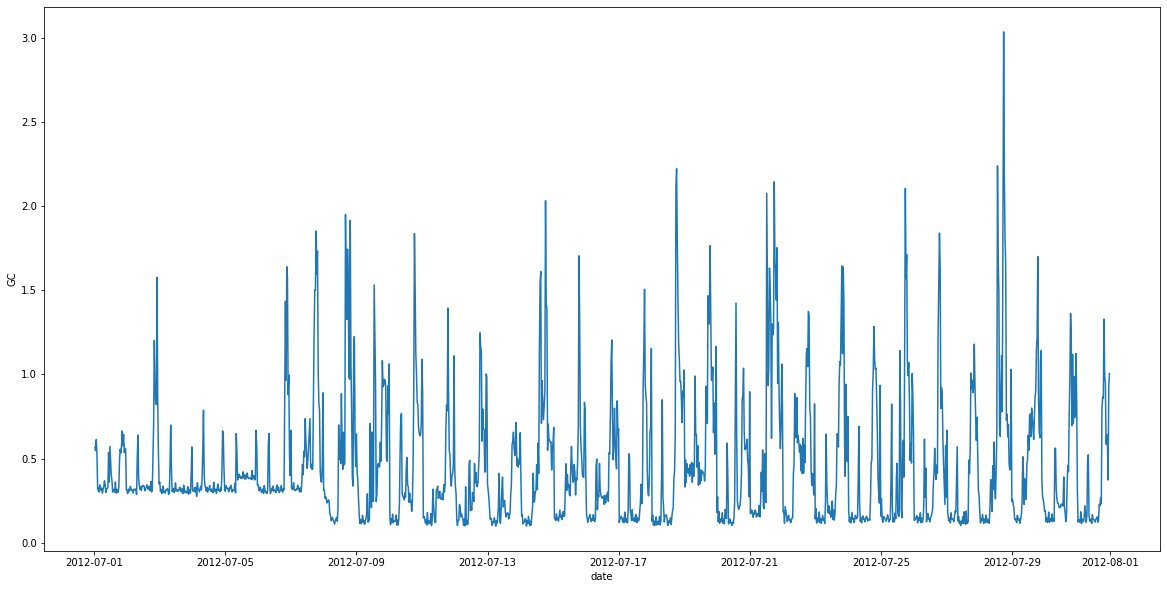

In [16]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x= july_data_2012.index, y="GC", data = july_data_2012)
fig.show()

In [17]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=july_data_2012.index,
                    y=july_data_2012.GC,
                    name = "Evolution de la conso par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la conso par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [18]:
fig = go.Figure([{
    'x': july_data_2012.index,
    'y': july_data_2012.GC,
    'name': col
}  for col in july_data_2012])

fig.show()

In [157]:
# data = data.iloc[:, 1:]
# data.head()

In [19]:
# Separate target variable Y from features X

target_name = 'GC'


Y = july_data_2012[target_name]
X = july_data_2012.drop(target_name, axis=1)

In [177]:
# # Convert pandas DataFrames to numpy arrays before using scikit-learn
# print("Convert pandas DataFrames to numpy arrays...")
# X = X.values
# Y = Y.tolist()
# print("...Done")
# print(X[0:5,:])
# print()
# print(Y[0:5])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [21]:
# Data normalization

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
display(X_train)

#sc_x.fit(X_train)
#X_train= sc_x.transform(X_train)

print("-------------")
X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
display(X_test)

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-15 15:30:00     1.643149             1.527446        -0.305388   
2012-07-01 15:00:00     1.146748             1.090847        -0.305388   
2012-07-15 01:30:00    -0.608734            -0.453152        -0.305388   
2012-07-01 00:30:00    -0.638321            -0.479175        -0.305388   
2012-07-07 03:00:00    -0.950626            -1.236717         1.055938   
...                          ...                  ...              ...   
2012-07-29 20:30:00    -0.187944            -0.083055        -0.305388   
2012-07-03 12:30:00     0.532001             0.550158        -0.138943   
2012-07-23 05:30:00     0.196684             0.255237        -0.305388   
2012-07-16 15:30:00     2.073801             1.906218        -0.250109   
2012-07-04 04:30:00    -1.558798            -1.976912        -0.121327   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-15 15:30:00          -0.452977 -1.034303 -2.350862  0.720495   
2012-07-01 15:00:00          -0.452977 -2.285815 -2.700347  0.713101   
2012-07-15 01:30:00          -0.452977 -0.870170 -0.253957  0.713101   
2012-07-01 00:30:00          -0.452977 -0.316221  0.357641  0.715976   
2012-07-07 03:00:00           0.847085 -0.377771  0.707125  0.750479   
...                                ...       ...       ...       ...   
2012-07-29 20:30:00          -0.452977 -0.078229  0.008157 -1.368128   
2012-07-03 12:30:00          -0.036957 -1.013786 -1.477152  0.725013   
2012-07-23 05:30:00          -0.452977  0.073594 -0.253957 -1.368128   
2012-07-16 15:30:00           0.015045 -0.402391 -2.263491  0.737746   
2012-07-04 04:30:00          -0.140962 -1.350258  0.445012  0.730147   

                     windSpeed  windGust  windBearing   uvIndex  cloudCover  \
date                                                                          
2012-07-15 15:30:00   1.556221  0.976354     0.192272  0.604907   -0.993198   
2012-07-01 15:00:00   1.112181  1.129985    -0.045552  0.604907   -0.462993   
2012-07-15 01:30:00  -0.326259 -0.596098     1.268738 -0.533123    1.569456   
2012-07-01 00:30:00  -1.620856 -1.531435     0.617851 -0.533123    0.921429   
2012-07-07 03:00:00  -0.057334 -0.392763     0.342476 -0.533123    0.744694   
...                        ...       ...          ...       ...         ...   
2012-07-29 20:30:00  -0.257464  0.235314    -0.333444 -0.533123   -0.197891   
2012-07-03 12:30:00   0.811985  0.899539     0.142204  2.880967   -0.904830   
2012-07-23 05:30:00   0.749444  1.491468    -1.159569 -0.533123    0.037755   
2012-07-16 15:30:00  -0.238702 -0.311430    -1.485012  0.604907   -1.346667   
2012-07-04 04:30:00   0.305404  0.036498     0.154721 -0.533123   -1.376123   

                     visibility  
date                             
2012-07-15 15:30:00   -2.671862  
2012-07-01 15:00:00    0.420058  
2012-07-15 01:30:00   -2.671862  
2012-07-01 00:30:00    0.415421  
2012-07-07 03:00:00    0.109413  
...                         ...  
2012-07-29 20:30:00    0.420058  
2012-07-03 12:30:00    0.415421  
2012-07-23 05:30:00    0.420058  
2012-07-16 15:30:00    0.415421  
2012-07-04 04:30:00    0.415421  

[1189 rows x 13 columns]

-------------


temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-30 05:00:00    -1.397715            -1.768732        -0.305388   
2012-07-29 06:30:00    -1.226769            -1.601032        -0.305388   
2012-07-01 09:00:00    -0.707357            -0.539894        -0.305388   
2012-07-31 03:30:00    -1.022949            -1.609706        -0.093383   
2012-07-23 23:30:00    -0.227393            -0.117752         0.721225   
...                          ...                  ...              ...   
2012-07-08 16:30:00     1.133599             1.079282        -0.305388   
2012-07-25 11:00:00     0.528713             0.547267        -0.305388   
2012-07-27 07:30:00    -1.062398            -1.178890        -0.305388   
2012-07-21 12:00:00     0.538576             0.555941        -0.305388   
2012-07-09 03:30:00    -1.657421            -1.375504        -0.305388   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-30 05:00:00          -0.452977 -0.857860  0.707125 -1.368128   
2012-07-29 06:30:00          -0.452977 -0.771690  0.619754  0.728915   
2012-07-01 09:00:00          -0.452977 -0.336738  0.445012  0.718852   
2012-07-31 03:30:00           0.951090 -0.775793  0.357641  0.735076   
2012-07-23 23:30:00           3.187198  0.245934  0.445012 -1.368128   
...                                ...       ...       ...       ...   
2012-07-08 16:30:00          -0.452977  1.366140 -0.079214  0.743702   
2012-07-25 11:00:00          -0.452977  1.349727  0.619754 -1.368128   
2012-07-27 07:30:00          -0.452977 -1.132782  0.008157  0.710226   
2012-07-21 12:00:00          -0.452977  0.726022  0.008157  0.745755   
2012-07-09 03:30:00          -0.452977  0.250037  2.541918  0.744728   

                     windSpeed  windGust  windBearing   uvIndex  cloudCover  \
date                                                                          
2012-07-30 05:00:00   0.174068 -0.126169     0.217306 -0.533123   -1.376123   
2012-07-29 06:30:00   0.224100 -0.112614     0.142204 -0.533123   -0.757551   
2012-07-01 09:00:00  -0.357530 -0.365652     0.893226  0.604907    0.980340   
2012-07-31 03:30:00   1.431140  1.554727    -0.258342 -0.533123    0.744694   
2012-07-23 23:30:00  -0.482612 -0.234614    -0.608819 -0.533123    0.833061   
...                        ...       ...          ...       ...         ...   
2012-07-08 16:30:00  -0.545152 -0.546394    -1.697802 -0.533123   -0.875374   
2012-07-25 11:00:00  -0.057334 -0.013206     0.843158  1.742937    0.833061   
2012-07-27 07:30:00  -0.651472 -0.831062     0.918260 -0.533123   -0.610272   
2012-07-21 12:00:00   1.524951  1.419171    -0.558751  2.880967    0.921429   
2012-07-09 03:30:00  -1.326913 -1.319064     0.943294 -0.533123   -0.875374   

                     visibility  
date                             
2012-07-30 05:00:00    0.415421  
2012-07-29 06:30:00    0.415421  
2012-07-01 09:00:00    0.420058  
2012-07-31 03:30:00    0.420058  
2012-07-23 23:30:00    0.420058  
...                         ...  
2012-07-08 16:30:00    0.420058  
2012-07-25 11:00:00    0.420058  
2012-07-27 07:30:00    0.420058  
2012-07-21 12:00:00    0.420058  
2012-07-09 03:30:00    0.420058  

[298 rows x 13 columns]

In [164]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train)
# X_test = sc_x.transform(X_test)

### Stat model

In [22]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GC   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     20.54
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           3.41e-44
Time:                        16:18:54   Log-Likelihood:                -401.33
No. Observations:                1189   AIC:                             830.7
Df Residuals:                    1175   BIC:                             901.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4449      0.010     44.973      0.000       0.426       0.464
temperature            -0.5954      0.102     -5.853      0.000      -0.795      -0.396
apparentTemperature     0.2435      0.060      4.075      0.000       0.126       0.361
precipIntensity        -0.0117      0.016     -0.740      0.460      -0.043       0.019
precipProbability      -0.0266      0.017     -1.600      0.110      -0.059       0.006
dewPoint                0.3492      0.068      5.148      0.000       0.216       0.482
humidity               -0.4510      0.075     -6.013      0.000      -0.598      -0.304
pressure                0.0045      0.010      0.455      0.649      -0.015       0.024
windSpeed              -0.0516      0.028     -1.840      0.066      -0.107       0.003
windGust                0.0340      0.027      1.250      0.212      -0.019       0.087
windBearing            -0.0687      0.012     -5.952      0.000      -0.091      -0.046
uvIndex                -0.0932      0.012     -8.049      0.000      -0.116      -0.070
cloudCover              0.0177      0.011      1.549      0.122      -0.005       0.040
visibility              0.0011      0.010      0.110      0.912      -0.019       0.021
==============================================================================
Omnibus:                      462.260   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2103.606
Skew:                           1.795   Prob(JB):                         0.00
Kurtosis:                       8.439   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print(" ")

print("Train score : {}".format(regressor.score(X_train, Y_train)))
print(" ")
print("Test score : {}".format(regressor.score(X_test, Y_test)))

 
Train score : 0.18514350693988502
 
Test score : 0.16647199695419046


In [43]:
regressor.coef_

array([-0.59544627,  0.24346357, -0.01173715, -0.02661353,  0.34921274,
       -0.45099639,  0.00454257, -0.05159444,  0.03403733, -0.06870667,
       -0.09322095,  0.01766811,  0.00113219])

In [44]:
coefs = pd.DataFrame(index=july_data_2012.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

coefficients
temperature             -0.595446
apparentTemperature      0.243464
precipIntensity         -0.011737
precipProbability       -0.026614
dewPoint                 0.349213
humidity                -0.450996
pressure                 0.004543
windSpeed               -0.051594
windGust                 0.034037
windBearing             -0.068707
uvIndex                 -0.093221
cloudCover               0.017668
visibility               0.001132

In [45]:
coefs.sort_values(by="coefficients", ascending=False)

coefficients
dewPoint                 0.349213
apparentTemperature      0.243464
windGust                 0.034037
cloudCover               0.017668
pressure                 0.004543
visibility               0.001132
precipIntensity         -0.011737
precipProbability       -0.026614
windSpeed               -0.051594
windBearing             -0.068707
uvIndex                 -0.093221
humidity                -0.450996
temperature             -0.595446

In [46]:
from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, Y_train)


feature_importance

(array([4.68580190e+01, 5.27105476e+01, 4.74867297e+00, 9.03217890e+00,
        5.57437502e+00, 3.69154891e+01, 2.06975827e-01, 4.35634602e+00,
        8.10552624e+00, 8.20543223e+01, 2.10808582e+01, 2.04408501e+00,
        2.15514371e-02]),
 array([1.22087355e-11, 6.97223149e-13, 2.95170000e-02, 2.70837641e-03,
        1.83860658e-02, 1.65913135e-09, 6.49231310e-01, 3.70841971e-02,
        4.48905871e-03, 5.31099385e-19, 4.87173877e-06, 1.53061969e-01,
        8.83311595e-01]))

In [48]:
feature_ranking = pd.DataFrame(columns=july_data_2012.columns[:-1], data=feature_importance,
                               index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

f-score       p-value
windBearing          82.054322  5.310994e-19
apparentTemperature  52.710548  6.972231e-13
temperature          46.858019  1.220874e-11
humidity             36.915489  1.659131e-09
uvIndex              21.080858  4.871739e-06
precipProbability     9.032179  2.708376e-03
windGust              8.105526  4.489059e-03
dewPoint              5.574375  1.838607e-02
precipIntensity       4.748673  2.951700e-02
windSpeed             4.356346  3.708420e-02
cloudCover            2.044085  1.530620e-01
pressure              0.206976  6.492313e-01
visibility            0.021551  8.833116e-01

C:\Users\FLaude E. BANZA\anaconda3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



<Figure size 1440x576 with 0 Axes>

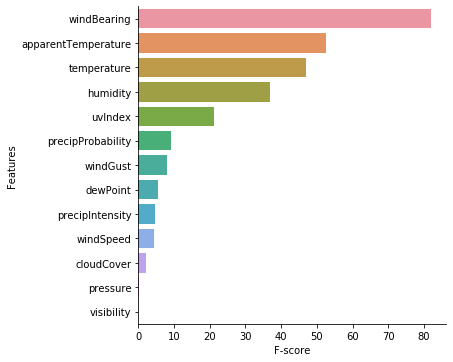

In [55]:
plt.figure(figsize = (20, 8))
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index],
                 data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

### RandomForest Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [26]:
print(" ")

print("RF_train score : {}".format(rf_regressor.score(X_train, Y_train)))
print(" ")
print("RF_test score : {}".format(rf_regressor.score(X_test, Y_test)))

 
RF_train score : 0.9033499193101399
 
RF_test score : 0.583031459589539


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_regressor_grid = RandomForestRegressor()
params = {"n_estimators": range(70, 200, 10),
          "max_depth" : range(9, 30),
          "max_features" : range(5, 10)
          }

regressor = GridSearchCV(cv=10, estimator = rf_regressor_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, Y_train)

Fitting 10 folds for each of 1365 candidates, totalling 13650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 20.0min


In [28]:
regressor.best_params_

{'max_depth': 9, 'max_features': 9, 'n_estimators': 70}

In [29]:
regressor.best_estimator_.score(X_train, Y_train)

0.8221542312666976

In [30]:
regressor.best_estimator_.score(X_test, Y_test)

0.5317101395123329

### XGboost Model 

In [37]:
!pip install xgboost


In [38]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
regressor_xgb.score(X_test, Y_test)

0.5429119492436043